In [1]:
import matplotlib.pyplot as plt
from models import QVoterWeron as QVoter
import numpy as np
import networkx as nx
from tqdm import tqdm

import pandas as pd
import pickle

* Implement the model with NN influence group

done. Check models/q_voter.py

In [2]:
""" Model simulations. """
""" global parameters set"""
num_of_steps = 1000
N = 100
q = [3, 4]
p = np.arange(0,0.502,0.02)

MC_runs = 100

In [3]:
# data collection

all_data = []
"""
all the data is storaged in the list:
[
[name_of_initial_graph, p_0, q_0, [average magnetization for each of 1000 steps]
[name_of_initial_graph, p_1, q_0, [average magnetization for each of 1000 steps]
.
.
.
[name_of_initial_graph, p_n, q_n, [average magnetization for each of 1000 steps]
]
"""
pass

In [4]:
""" barabasi-albert """
network = nx.barabasi_albert_graph(N, 4)
q_voter = QVoter(network)

for q_i in q:
    print(f'q={q_i}')
    for p_i in tqdm(p):
        magnetization_over_time = []
        for _ in range(MC_runs):
            mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q_i)
            magnetization_over_time.append(mg)
        all_data.append(('BA(100,4)',
            q_i,
            p_i,
            np.mean(magnetization_over_time, 0)
        ))

q=3


100%|██████████| 26/26 [03:12<00:00,  7.40s/it]


q=4


100%|██████████| 26/26 [03:19<00:00,  7.68s/it]


In [5]:
""" watts-strogatz WS(100,4,0.01) """
network = nx.watts_strogatz_graph(N,4,0.01)
q_voter = QVoter(network)

for q_i in q:
    print(f'q={q_i}')
    for p_i in tqdm(p):
        magnetization_over_time = []
        for _ in range(MC_runs):
            mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q_i)
            magnetization_over_time.append(mg)
        all_data.append(('WS(100,4,0.01)',
            q_i,
            p_i,
            np.mean(magnetization_over_time, 0)
        ))

q=3


100%|██████████| 26/26 [03:19<00:00,  7.69s/it]


q=4


100%|██████████| 26/26 [03:27<00:00,  7.96s/it]


In [6]:
""" watts-strogatz WS(100,4,0.02) """
network = nx.watts_strogatz_graph(N,4,0.01)
q_voter = QVoter(network)

for q_i in q:
    print(f'q={q_i}')
    for p_i in tqdm(p):
        magnetization_over_time = []
        for _ in range(MC_runs):
            mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q_i)
            magnetization_over_time.append(mg)
        all_data.append(('WS(100,4,0.02)',
            q_i,
            p_i,
            np.mean(magnetization_over_time, 0)
        ))

q=3


100%|██████████| 26/26 [03:23<00:00,  7.83s/it]


q=4


100%|██████████| 26/26 [03:22<00:00,  7.78s/it]


In [7]:
""" complete graph """
network = nx.complete_graph(N)
q_voter = QVoter(network)

for q_i in q:
    print(f'q={q_i}')
    for p_i in tqdm(p):
        magnetization_over_time = []
        for _ in range(MC_runs):
            mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q_i)
            magnetization_over_time.append(mg)
        all_data.append(('complete-graph(N)',
            q_i,
            p_i,
            np.mean(magnetization_over_time, 0)
        ))

q=3


100%|██████████| 26/26 [03:50<00:00,  8.87s/it]


q=4


100%|██████████| 26/26 [03:52<00:00,  8.92s/it]


In [11]:
df = pd.DataFrame(all_data, columns=['graph_name','q','p','avg_magnetization_over_time'])

# save to pickle
with open('data/all_data.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

df

,graph_name,q,p,avg_magnetization_over_time
0,"BA(100,4)",3,0.00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,"BA(100,4)",3,0.02,"[0.9996, 0.9994000000000001, 0.999000000000000..."
2,"BA(100,4)",3,0.04,"[1.0, 0.9988000000000001, 0.9980000000000001, ..."
3,"BA(100,4)",3,0.06,"[0.9998, 0.9994000000000001, 0.998999999999999..."
4,"BA(100,4)",3,0.08,"[0.9984000000000001, 0.9978, 0.996600000000000..."
...,...,...,...,...
203,complete-graph(N),4,0.42,"[0.9960000000000001, 0.9912000000000001, 0.986..."
204,complete-graph(N),4,0.44,"[0.9972, 0.9916000000000001, 0.987200000000000..."
205,complete-graph(N),4,0.46,"[0.9962000000000003, 0.9928000000000003, 0.989..."
206,complete-graph(N),4,0.48,"[0.9940000000000002, 0.9886, 0.984999999999999..."


In [12]:
with open('data/all_data.pickle', 'rb') as handle:
    df = pickle.load(handle)
df

,graph_name,q,p,avg_magnetization_over_time
0,"BA(100,4)",3,0.00,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,"BA(100,4)",3,0.02,"[0.9996, 0.9994000000000001, 0.999000000000000..."
2,"BA(100,4)",3,0.04,"[1.0, 0.9988000000000001, 0.9980000000000001, ..."
3,"BA(100,4)",3,0.06,"[0.9998, 0.9994000000000001, 0.998999999999999..."
4,"BA(100,4)",3,0.08,"[0.9984000000000001, 0.9978, 0.996600000000000..."
...,...,...,...,...
203,complete-graph(N),4,0.42,"[0.9960000000000001, 0.9912000000000001, 0.986..."
204,complete-graph(N),4,0.44,"[0.9972, 0.9916000000000001, 0.987200000000000..."
205,complete-graph(N),4,0.46,"[0.9962000000000003, 0.9928000000000003, 0.989..."
206,complete-graph(N),4,0.48,"[0.9940000000000002, 0.9886, 0.984999999999999..."


Plot the time evolution of the magnetization for the WS(100,4,0.01)
network (both averaged and from single run).

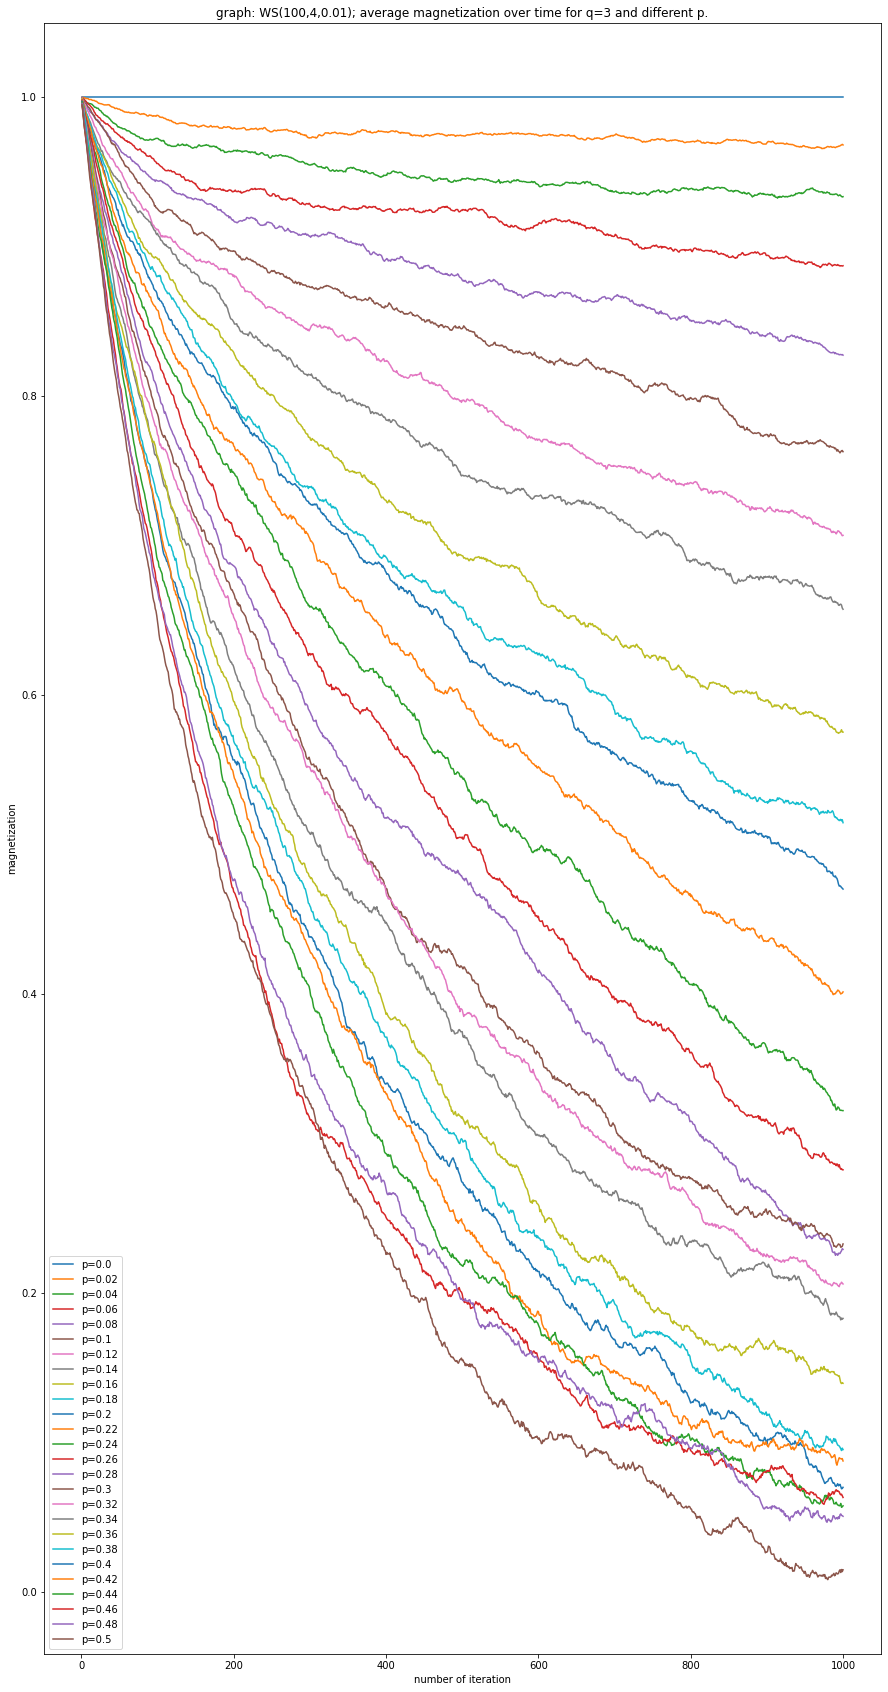

In [15]:
name = 'WS(100,4,0.01)'
q=3

ws100401 = df[df['graph_name'] == name]

plt.figure(figsize=(15,30))
x=np.linspace(1,1000,1000)
for index, row in ws100401[ws100401['q'] == q].iterrows():
    plt.plot(x,row['avg_magnetization_over_time'], label=f'p={row["p"]}')

plt.legend()
plt.ylabel('magnetization')
plt.xlabel('number of iteration')
plt.title(f'graph: {name}; average magnetization over time for q={q} and different p.')
plt.show()

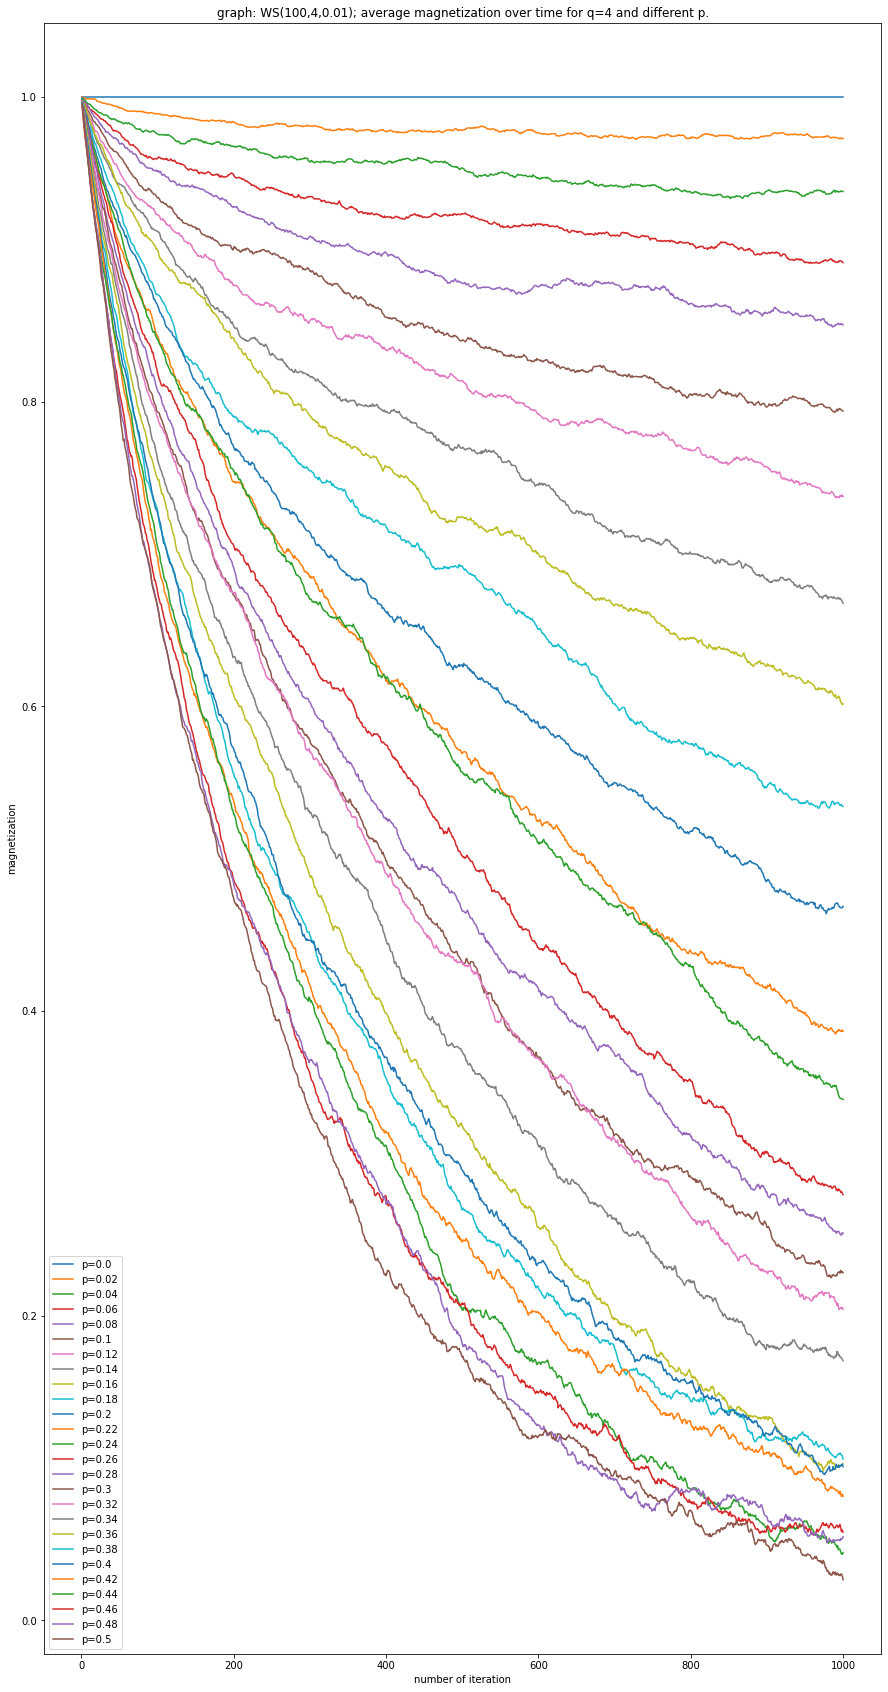

In [16]:
name = 'WS(100,4,0.01)'
q=4

ws100401 = df[df['graph_name'] == name]

plt.figure(figsize=(15,30))
x=np.linspace(1,1000,1000)
for index, row in ws100401[ws100401['q'] == q].iterrows():
    plt.plot(x,row['avg_magnetization_over_time'], label=f'p={row["p"]}')

plt.legend()
plt.ylabel('magnetization')
plt.xlabel('number of iteration')
plt.title(f'graph: {name}; average magnetization over time for q={q} and different p.')
plt.show()

100%|██████████| 6/6 [00:00<00:00, 12.48it/s]


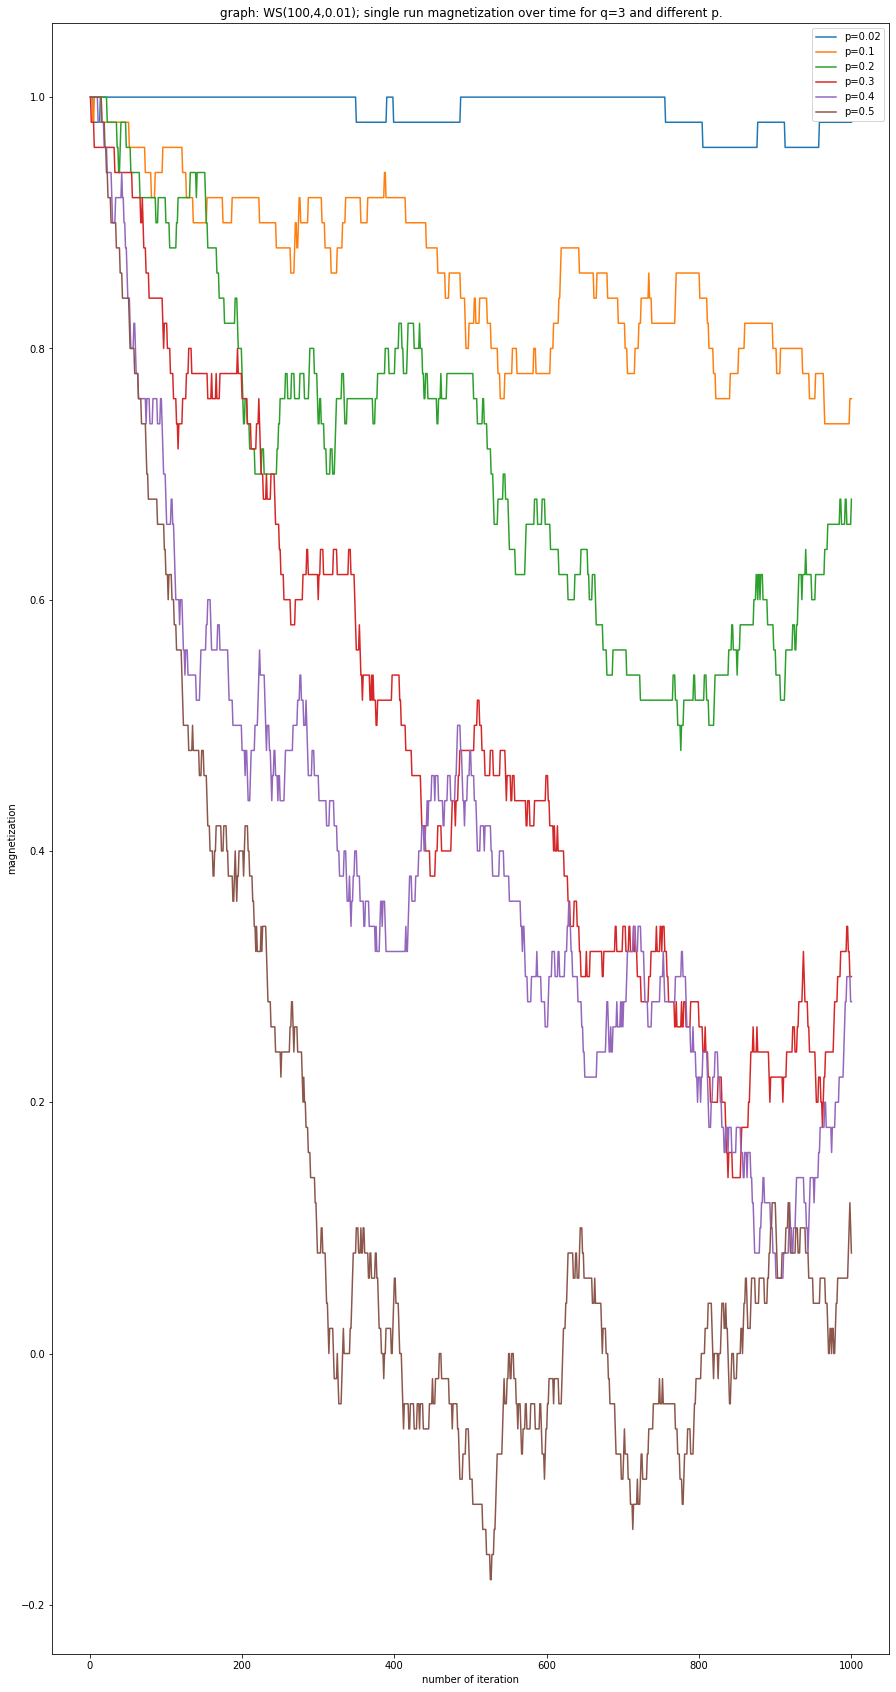

In [17]:
# same for some single runs
name = 'WS(100,4,0.01)'
q = 3
p = (0.02, 0.1, 0.2, 0.3, 0.4, 0.5)

network = nx.watts_strogatz_graph(N,4,0.01)
q_voter = QVoter(network)

plt.figure(figsize=(15,30))
x=np.linspace(1,1000,1000)
for p_i in tqdm(p):
    mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q)
    plt.plot(x,mg, label=f'p={p_i}')

plt.legend()
plt.ylabel('magnetization')
plt.xlabel('number of iteration')
plt.title(f'graph: {name}; single run magnetization over time for q={q} and different p.')
plt.show()

100%|██████████| 6/6 [00:00<00:00, 12.72it/s]


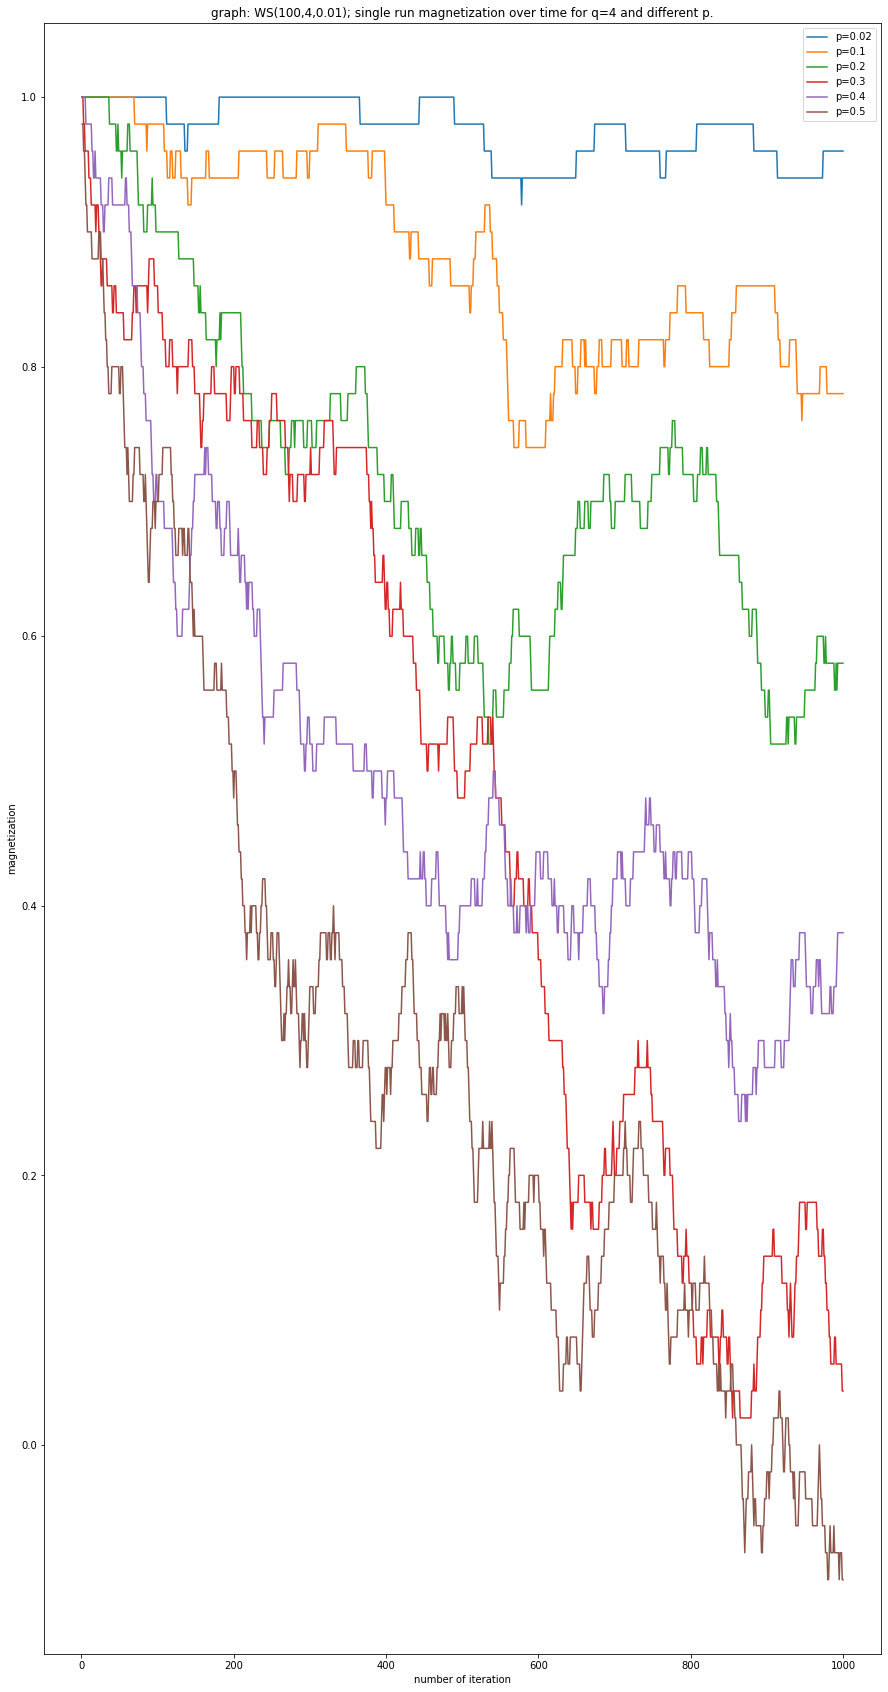

In [18]:
# same for some single runs
name = 'WS(100,4,0.01)'
q = 4
p = (0.02, 0.1, 0.2, 0.3, 0.4, 0.5)

network = nx.watts_strogatz_graph(N,4,0.01)
q_voter = QVoter(network)

plt.figure(figsize=(15,30))
x=np.linspace(1,1000,1000)
for p_i in tqdm(p):
    mg = q_voter.simulate(num_of_events=num_of_steps, p=p_i, q=q)
    plt.plot(x,mg, label=f'p={p_i}')

plt.legend()
plt.ylabel('magnetization')
plt.xlabel('number of iteration')
plt.title(f'graph: {name}; single run magnetization over time for q={q} and different p.')
plt.show()

Plot the average final magnetization as a function of independence
factor p for
* q = 3 and different network topologies (one plot)

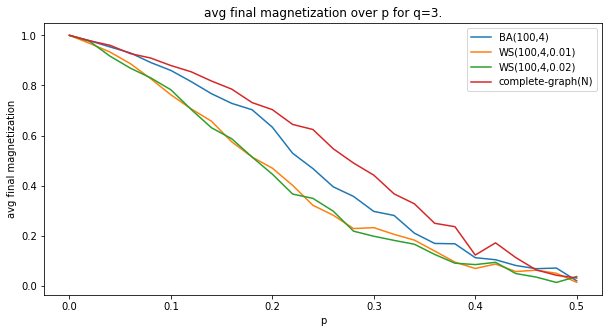

In [37]:
df['avg_final_magnetization'] = df['avg_magnetization_over_time'].apply(lambda x: x[-1])
q = 3

plt.figure(figsize=(10,5))
for topology in df['graph_name'].unique():
    sub_df = df[(df['graph_name'] == topology) & (df['q'] == q) ]
    plt.plot(sub_df['p'], sub_df['avg_final_magnetization'], label = f'{topology}')
plt.legend()
plt.ylabel('avg final magnetization')
plt.xlabel('p')
plt.title(f'avg final magnetization over p for q={q}.')
plt.show()

* q = 4 and different network topologies (one plot)

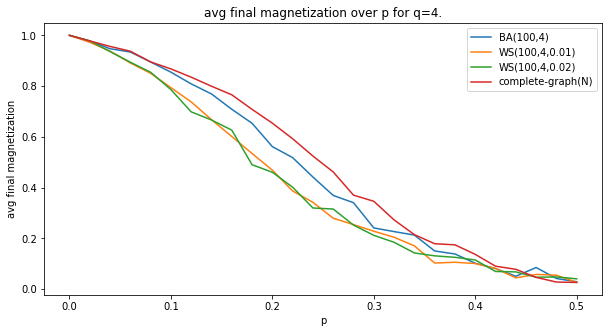

In [38]:
df['avg_final_magnetization'] = df['avg_magnetization_over_time'].apply(lambda x: x[-1])
q = 4

plt.figure(figsize=(10,5))
for topology in df['graph_name'].unique():
    sub_df = df[(df['graph_name'] == topology) & (df['q'] == q) ]
    plt.plot(sub_df['p'], sub_df['avg_final_magnetization'], label = f'{topology}')
plt.legend()
plt.ylabel('avg final magnetization')
plt.xlabel('p')
plt.title(f'avg final magnetization over p for q={q}.')
plt.show()

* WS(100,4,0.01) network and different values of q (one plot)

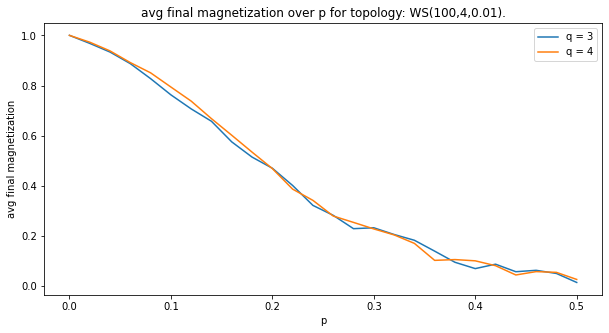

In [39]:
df['avg_final_magnetization'] = df['avg_magnetization_over_time'].apply(lambda x: x[-1])
q = [3,4]
name = 'WS(100,4,0.01)'

plt.figure(figsize=(10,5))
for q_i in q:
    sub_df = df[(df['graph_name'] == name) & (df['q'] == q_i) ]
    plt.plot(sub_df['p'], sub_df['avg_final_magnetization'], label = f'q = {q_i}')
plt.legend()
plt.ylabel('avg final magnetization')
plt.xlabel('p')
plt.title(f'avg final magnetization over p for topology: {name}.')
plt.show()